Trabalho final - RRT reativo. 

Abra a cena "cena2_test.ttt" e execute o código a seguir.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
import matplotlib.image as mpimg
import networkx as nx

from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import Polygon

from descartes.patch import PolygonPatch

try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')

class LaserData:
    dist = 0
    angle = 0
    x = 0
    y = 0
    
    def __init__(self,distance,angle_beam,x_obs,y_obs):
        self.dist = distance
        self.angle = angle_beam
        self.x = x_obs
        self.y = y_obs

    
# Retorna um vetor com duas colunas: [angulo, dist]
def format_laser_data(clientID, rangedata, angledata):
    laser_data=[]
    returnCodeRanges, string_range_data = sim.simxGetStringSignal(clientID, rangedata, sim.simx_opmode_streaming)
    returnCodeAngles, string_angle_data = sim.simxGetStringSignal(clientID, angledata, sim.simx_opmode_blocking)
    if returnCodeRanges == 0 and returnCodeAngles == 0:
        # unpack data from range and sensor messages
        raw_range_data = sim.simxUnpackFloats(string_range_data)
        raw_angle_data = sim.simxUnpackFloats(string_angle_data)
        #calculate x,y coordinates of an obstacle based on beam distance and angle
        for i in range(len(raw_range_data)):
            x = (raw_range_data[i]*np.cos(raw_angle_data[i]))
            y = (raw_range_data[i]*np.sin(raw_angle_data[i]))

            data = LaserData(raw_range_data[i], raw_angle_data[i], x, y)
            laser_data.append(data)
        return laser_data

    # return none in case were nothing was gotten from the simulator
    return None

def Rz(theta):
    return np.array([[  np.cos(theta), np.sin(theta),  0],
                      [ -np.sin(theta), np.cos(theta),  0],
                      [ 0,             0,              1]])

def calcRepulsiveForce(laser_data):
    k_r = 1.0
    rep_force = np.array([0,0])
    for item in laser_data:
        dist = item.dist
        angle = item.angle
        print(angle)
        x = item.x
        y = item.y
        #distância máxima pra considerar a força de um obstaculo
        if dist <= 0.5:
            fx = k_r*(1/(dist**2))
            fy = k_r*(1/(dist**2))
            #print("fx",fx, "fy ",fy)
            #rep_force[0] = rep_force[0] - fx
            #rep_force[1] = rep_force[1] - fy
            rep_force[0] = -fx
            rep_force[1] = -fy
    return rep_force

def getLaserRegion(laser_data):
    i = 0
    repForce = np.array([0,0])
    for item in laser_data:
        dist = item.dist
        if(dist <= 1.0):
            if i < 284:
                repForce = np.array([0,0])
            elif (i >= 284 and i < 456):
                repForce = np.array([0,1])
            elif (i >= 456):
                repForce = np.array([0,0])
            print(dist)
        i = i + 1
    print(repForce)
    return repForce

def state_machine(laser_data):
    repForce = getLaserRegion(laser_data)
    if(repForce[0] == 0 and repForce[1] == 0):
        #seguir caminho RRt
        return True, repForce
    else:
        #desviar de obstaculo
        return False, repForce

Program started
Connected to remote API server
Path has been found after  0  iterations!
[(15.24963665008545, 16.900331497192383), (12.481539725593084, 4.3456772492343605), (10, 10)]
Starting navigation to goal...
qgoal:  [15.24963665 16.9003315   0.        ]
[2.00271606e-05 5.72204590e-06 0.00000000e+00]
Cell  (15.24963665008545, 16.900331497192383)  reached!
qgoal:  [12.48153973  4.34567725  0.        ]
[ -2.76808357 -12.55465616   0.        ]
[ -2.76809216 -12.55466378   0.        ]
[ -2.76792812 -12.53059877   0.        ]
[ -2.75811482 -12.47506631   0.        ]
[ -2.73808003 -12.40635789   0.        ]
[ -2.71536732 -12.33498491   0.        ]
[ -2.69156933 -12.26380075   0.        ]
[ -2.66744518 -12.19318307   0.        ]
[ -2.64354134 -12.12354005   0.        ]
[ -2.6197052  -12.05424608   0.        ]
[ -2.59552765 -11.98493875   0.        ]
[ -2.57147503 -11.91645349   0.        ]
[ -2.54739094 -11.84834207   0.        ]
[ -2.52346039 -11.7805549    0.        ]
[ -2.49928951 -11

[ 0.31278038 -3.9663173   0.        ]
[ 0.31887531 -3.94318879  0.        ]
[ 0.32487678 -3.92023195  0.        ]
[ 0.33081531 -3.89745725  0.        ]
[ 0.33664036 -3.87480176  0.        ]
[ 0.34244919 -3.85212911  0.        ]
[ 0.34807205 -3.8296634   0.        ]
[ 0.35375214 -3.80725301  0.        ]
[ 0.35927582 -3.7849685   0.        ]
[ 0.36458492 -3.76289857  0.        ]
[ 0.36996365 -3.74089921  0.        ]
[ 0.37531757 -3.7189647   0.        ]
[ 0.38057423 -3.69715703  0.        ]
[ 0.38571834 -3.67548955  0.        ]
[ 0.39071655 -3.65396798  0.        ]
[ 0.39571857 -3.63251889  0.        ]
[ 0.4006815  -3.61119283  0.        ]
[ 0.40555572 -3.58990491  0.        ]
[ 0.41044521 -3.56888784  0.        ]
[ 0.4152441  -3.54778732  0.        ]
[ 0.41996002 -3.5268823   0.        ]
[ 0.42454243 -3.50613178  0.        ]
[ 0.42913532 -3.4854256   0.        ]
[ 0.43362617 -3.46492685  0.        ]
[ 0.43810368 -3.44440377  0.        ]
[ 0.44240761 -3.42408765  0.        ]
[ 0.44677448

Avoiding obstacle
[ 2.78715992 -8.98613084  0.        ]
Avoiding obstacle
[ 2.74368858 -9.00392164  0.        ]
Avoiding obstacle
[ 2.72001648 -9.01169694  0.        ]
Avoiding obstacle
[ 2.6996851  -9.00940812  0.        ]
Avoiding obstacle
[ 2.64315796 -9.02819646  0.        ]
Avoiding obstacle
[ 2.46332836 -9.08141053  0.        ]
Avoiding obstacle
[ 2.10608387 -9.19680513  0.        ]
Avoiding obstacle
[ 1.92283249 -9.28521074  0.        ]
Avoiding obstacle
[ 1.83093071 -9.31446183  0.        ]
Avoiding obstacle
[ 1.77268124 -9.33547319  0.        ]
Avoiding obstacle
[ 1.73219013 -9.26330865  0.        ]
Avoiding obstacle
[ 1.66493034 -9.06670964  0.        ]
Avoiding obstacle
[ 1.62101078 -8.93946565  0.        ]
Avoiding obstacle
[ 1.58217812 -8.85510267  0.        ]
Avoiding obstacle
[ 1.58516788 -8.85025609  0.        ]
Avoiding obstacle
[ 1.63139534 -8.87074388  0.        ]
Avoiding obstacle
[ 1.6744976  -8.89999116  0.        ]
Avoiding obstacle
[ 1.67902183 -8.92392457  0.  

TypeError: 'NoneType' object is not iterable

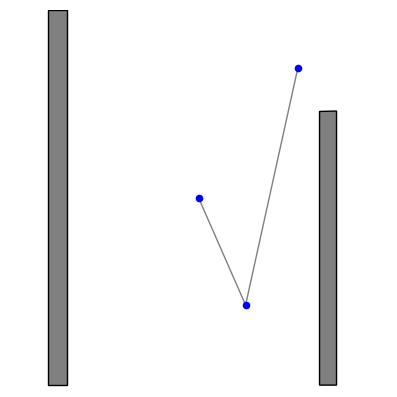

In [118]:
class RRT:
    def __init__(self, start, goal, map_dims, obstacles, bias, epsilon, max_iter):
        self.goal = goal
        self.start = start
        self.width = map_dims[0]
        self.height = map_dims[1]
        self.obstacles = obstacles
        self.bias = bias
        self.max_iter = max_iter
        self.epsilon = epsilon

        self.show_map(obs_set, map_dims)
        self.G = nx.Graph()
        self.G.add_node((start[0], start[1]))
        
        
    #Desenha o mapa com obstáculos
    def show_map(self, obs_set, map_dims):
        fig = plt.figure(figsize=(8,5), dpi=100)
        ax = fig.add_subplot(111, aspect='equal') 

        for obs in obs_set:
            ax.add_patch(PolygonPatch(obs, facecolor='gray'))
        
        ax.set_xlim(0, self.width)
        ax.set_ylim(0, self.height)
    
    #Amostra um ponto livre no mapa
    def sample_point(self):            
        x = random.uniform(1, self.width-1) #limitando pelo tamanho da parede
        y = random.uniform(1, self.height-1)
        p = Point([x,y])
        
        #se o ponto intercepta um obstáculo, retorna falso
        for o in self.obstacles:
            if p.intersects(o):
                return False, p
        return True, p
    
    #distância euclidiana
    def distance(self, p1, p2):
        px = (p1[0] - p2.x)**2
        py = (p1[1] - p2.y)**2
        return (px + py)**(0.5)
    
    #encontra o nó vizinho mais próximo à amostra fornecida
    def nearest_neighbor(self, sample):
        d = 1000
        n = self.G[start]
        for node in self.G:
            dist = self.distance(node, sample)
            if dist < d:
                d = dist
                n = node
        return d, n
    
    #expande o nó mais próximo em direção à amostra numa distancia fixa epsilon
    def expand_tree(self, n, d, sample):
        theta = math.asin((sample.y-n[1])/d)
        #x = n[0]+self.epsilon*np.cos(theta)
        #y = n[1]+self.epsilon*np.sin(theta)
        x = sample.x
        y = sample.y
        if x < 0:
            x = 0
        if x > self.width:
            x = self.width
        if y < 0:
            y = 0
        if y > self.height:
            y = self.height
        
        p = Point([x,y])
        node = Point([n[0], n[1]])
        line = LineString([p,n])
        for o in self.obstacles:
            if line.intersects(o):
                return x, y, False
        return x, y, True
    
        #for s in samples:
        #    print(s)
        #    plt.plot(*s[0].xy,'b*')
        
    #tenta fazer uma conexão direta do nó ao alvo
    def try_connect_goal(self, x, y):
        p = Point([x,y])
        g = Point([goal[0],goal[1]])
        line = LineString([p,g])
        for o in self.obstacles:
            if line.intersects(o):
                return False
        self.G.add_node((goal[0], goal[1]))
        self.G.add_edge((x,y),(goal[0], goal[1]))
        return True
    
    #executa rrt
    def run(self):
        i = 0
        path_found = False
        path=[]
        while i < self.max_iter and not path_found:
            is_sample_valid = False
            sample = (0,0)
            while not is_sample_valid:
                is_sample_valid, sample = self.sample_point();            
            sample = random.choices(population=[Point([goal[0],goal[1]]),sample],weights=[bias,1-bias])
            d, n = self.nearest_neighbor(sample[0])
            x, y, is_valid_connection = self.expand_tree(n, d, sample[0])
            if not is_valid_connection:
                continue
            self.G.add_node((x, y))
            self.G.add_edge(n, (x,y))
            
            path_found = self.try_connect_goal(x,y)
            if(path_found):
                print("Path has been found after ",i," iterations!")
                path = nx.shortest_path(self.G, source=(self.start[0], self.start[1]), target=(self.goal[0], self.goal[1]))
                
                pos = {node:(node[0], node[1]) for node in self.G.nodes()}
                #nx.draw_networkx_nodes(self.G, pos, nodelist=path, node_size=100, node_color='b')
                nx.draw(self.G, pos, font_size=3, with_labels=False, node_size=20, node_color='b', width=1, edge_color='gray')
                return path_found, path
            i=i+1
        print("Could not find path after ",i, " iterations.")
        pos = {node:(node[0], node[1]) for node in self.G.nodes()}
        #nx.draw_networkx_nodes(self.G, pos, nodelist=path, node_size=100, node_color='b')
        nx.draw(self.G, pos, font_size=3, with_labels=False, node_size=20, node_color='b', width=1, edge_color='gray')
        return path_found, path
            
#obstaculos caverna
obstacle1 = Polygon([(1.5,20),(1.5, 17.5),(6.5,17.5),(6.5,20)])
obstacle2 = Polygon([(8,18.5),(8,14.5),(12.5,14.5), (12.5,18.5)])
obstacle3 = Polygon([(20, 8.2),(14.75, 8.5),(14,8),(12,9),(8.5,9),(8.5,12.5),(13,12.5),(14.35,14.5),(17.2,13.5),(17.3,12.5),(20,12.5)])
obstacle4 = Polygon([(3.5,12.3),(3.5,16),(6.75,16),(6.75,12.5)])
obstacle5 = Polygon([(2.5,5),(2.5,9.3),(5.5,9.3),(5.5,5)])
obstacle6 = Polygon([(8,4),(8,7.5),(13.5,7.5),(13.5,4.5)])
obstacle7 = Polygon([(15,0),(15,4),(20,4),(20,0)])

#obstaculos cena2
obstacle8 = Polygon([(3,0.1),(2, 0.1),(2,20),(3,20)])
obstacle9 = Polygon([(16.4,14.6),(17.3,14.62),(17.3,0.1),(16.4,0.1)])

obs_set = [obstacle8, obstacle9]

print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')

    robotname = 'robotino'
    returnCode, robotHandle = sim.simxGetObjectHandle(clientID, robotname, sim.simx_opmode_oneshot_wait)     
                 
    returnCode, wheel1 = sim.simxGetObjectHandle(clientID, 'wheel0_joint', sim.simx_opmode_oneshot_wait)
    returnCode, wheel2 = sim.simxGetObjectHandle(clientID, 'wheel1_joint', sim.simx_opmode_oneshot_wait)
    returnCode, wheel3 = sim.simxGetObjectHandle(clientID, 'wheel2_joint', sim.simx_opmode_oneshot_wait)
    
    # Robotino
    L = 0.135   # Metros
    r = 0.040   # Metros
    
    returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
    returnCode, ori = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
    
    robot_pos = (pos[0], pos[1])
    start = robot_pos
    goal = (10,10)
    map_dims = np.array([20, 20]) 
    
    laser_data_name = "hokuyo_range_data"
    
    # Geralmente a primeira leitura é inválida (atenção ao Operation Mode)
    # Em loop até garantir que as leituras serão válidas
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, laser_data_name, sim.simx_opmode_streaming + 10)
    returnCode = 1
    while returnCode != 0:
        returnCode, range_data = sim.simxGetStringSignal(clientID, "hokuyo_range_data2", sim.simx_opmode_streaming + 10)

    bias = 0.05
    max_dist = 1.0
    max_iter = 1000
    rrt = RRT(start, goal, map_dims, obs_set, bias, max_dist, max_iter)
    found, path = rrt.run()
    print(path)
    startTime=time.time()
    lastTime = startTime
    if found:
        # Cinemática Direta
        Mdir = np.array([[-r/np.sqrt(3), 0, r/np.sqrt(3)], [r/3, (-2*r)/3, r/3], [r/(3*L), r/(3*L), r/(3*L)]])

        gain = np.array([[0.03, 0, 0], [0, 0.03, 0], [0, 0, 0.03]])

        print("Starting navigation to goal...")
        goal_reached = False
        for cell in path:
            qgoal = np.array([cell[0], cell[1], 0])
            print("qgoal: ",qgoal)
            cell_reached = False
            celltime = 0
            while not cell_reached:
                now = time.time()
                dt = now - lastTime
                returnCode, pos = sim.simxGetObjectPosition(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)        
                returnCode, ori = sim.simxGetObjectOrientation(clientID, robotHandle, -1, sim.simx_opmode_oneshot_wait)
                laser_data = format_laser_data(clientID, "hokuyo_range_data", "hokuyo_angle_data")
                laser_data2 = format_laser_data(clientID, "hokuyo_range_data2", "hokuyo_angle_data2")
                q = np.array([pos[0], pos[1], ori[2]])
                error = qgoal - q
                error[2] = 0
                print(error)
                #follow_path, repForce = state_machine(laser_data)
                #follow_path = False
                i = 0
                follow_path = True
                
                #laser da frente
                for item in laser_data:
                    dist = item.dist
                    if(dist <= 1.0):
                        follow_path = False
                        if i < 284:
                            #print("esquerda")
                            repForce = np.array([1,0])
                        elif (i >= 284 and i < 456):
                            #print("meio")
                            repForce = np.array([1,0])
                        elif (i >= 456):
                            #print("direito")
                            repForce = np.array([1,0])
                        #print(dist)
                    i = i + 1
                
                #laser de trás
                for item in laser_data2:
                    dist = item.dist
                    if(dist <= 1.0):
                        follow_path = False
                        if i < 284:
                            #print("esquerda")
                            repForce = np.array([-1,0])
                        elif (i >= 284 and i < 456):
                            #print("meio")
                            repForce = np.array([-1,0])
                        elif (i >= 456):
                            #print("direito")
                            repForce = np.array([-1,0])
                        #print(dist)
                    i = i + 1
                
                if follow_path:
                    # Controller
                    qdot = gain @ error
                else:
                    print('Avoiding obstacle')
                    qdot = np.array([repForce[0], repForce[1], 0])

                # Margem aceitável de distância
                if (np.linalg.norm(error[:2]) < 0.5):
                    cell_reached = True
                    
                Minv = np.linalg.inv(Rz(q[2]) @ Mdir)
                
                u = Minv @ qdot
                # Enviando velocidades
                sim.simxSetJointTargetVelocity(clientID, wheel1, u[0], sim.simx_opmode_streaming)
                sim.simxSetJointTargetVelocity(clientID, wheel2, u[1], sim.simx_opmode_streaming)
                sim.simxSetJointTargetVelocity(clientID, wheel3, u[2], sim.simx_opmode_streaming)
                celltime = celltime + dt  
                lastTime = now
            print("Cell ",cell," reached!")
            
    sim.simxSetJointTargetVelocity(clientID, wheel1, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, wheel2, 0, sim.simx_opmode_oneshot_wait)
    sim.simxSetJointTargetVelocity(clientID, wheel3, 0, sim.simx_opmode_oneshot_wait)
    
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print('Failed connecting to remote API server')
    